In [24]:
from fredapi import Fred
import pandas as pd

from fredapi import Fred
import matplotlib.pyplot as plt
import scipy.stats as ss

In [23]:
df.to_csv("data.csv")

In [10]:

fred = Fred(api_key="91349b4b1b532715d85f4513d8188365")
tenors = ["DGS1", "DGS2", "DGS5", "DGS10", "DGS30"]

# fetch each separately and concat
frames = []
for s in tenors:
    ts = fred.get_series(s, observation_start="2005-01-01")
    ts.name = s
    frames.append(ts)

df = pd.concat(frames, axis=1).ffill().dropna()
df.columns = ["Y1","Y2","Y5","Y10","Y30"]

In [12]:
df['S2_10'] = df['Y10'] - df['Y2']
df['S5_30'] = df['Y30'] - df['Y5']

In [13]:
window = 60
df['S2_10_mean'] = df['S2_10'].rolling(window).mean()
df['S2_10_std']  = df['S2_10'].rolling(window).std()
df['S2_10_z']    = (df['S2_10'] - df['S2_10_mean']) / df['S2_10_std']

In [14]:
df['Y10_vol'] = df['Y10'].ewm(halflife=21).std()

In [15]:
df['S2_10_next']    = df['S2_10'].shift(-21)
df['Carry_2_10']    = df['S2_10_next'] - df['S2_10']

In [16]:
stats = df[["S2_10","S5_30","S2_10_z","Y10_vol","Carry_2_10"]].agg(
    ["mean","std","skew","kurtosis"]
).T
print(stats)

                mean       std      skew  kurtosis
S2_10       0.985953  0.961463  0.168754 -0.968843
S5_30       1.112594  0.800548  0.239536 -1.142179
S2_10_z    -0.131125  1.411353  0.209744 -0.740156
Y10_vol     0.191987  0.095672  1.561627  3.388208
Carry_2_10 -0.001855  0.170257  0.120495  2.276846


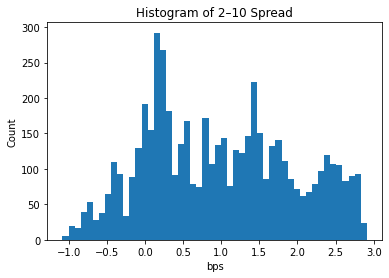

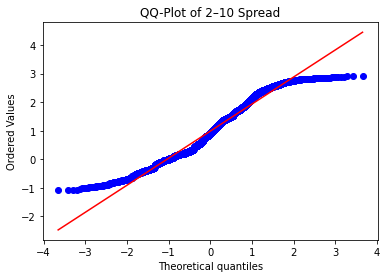

In [17]:


x = df["S2_10"].dropna()

# Histogram
plt.figure()
plt.hist(x, bins=50)
plt.title("Histogram of 2–10 Spread")
plt.xlabel("bps")
plt.ylabel("Count")
plt.show()

# QQ-plot
plt.figure()
ss.probplot(x, dist="norm", plot=plt)
plt.title("QQ-Plot of 2–10 Spread")
plt.show()

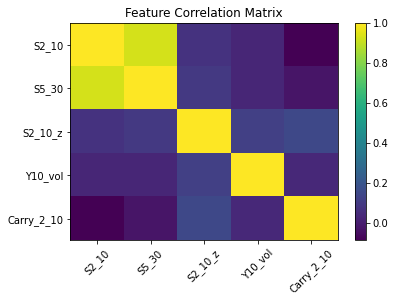

In [20]:
import matplotlib.pyplot as plt

corr = df[["S2_10","S5_30","S2_10_z","Y10_vol","Carry_2_10"]].corr()

plt.figure()
plt.imshow(corr, interpolation="none", aspect="auto")
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns, rotation=45)
plt.yticks(range(len(corr)), corr.columns)
plt.title("Feature Correlation Matrix")
plt.show()


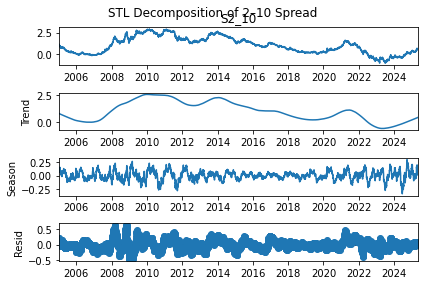

In [21]:
from statsmodels.tsa.seasonal import STL

stl = STL(df["S2_10"].dropna(), period=252)
res = stl.fit()
res.plot()
plt.suptitle("STL Decomposition of 2–10 Spread")
plt.show()